In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import json 
from astropy import units as u
import itertools as it
import os

In [2]:
with open("/Users/snorris/manyTDE/data/sources/ASASSN-14ae.json") as f:
    data = json.load(f)

In [3]:
print(data)


{'name': 'ASASSN-14ae', 'catalog_version': 'v0.4', 'catalog_creation_date': 'June-2024', 'ra': 167.1671635, 'dec': 34.09784698, 'z': 0.0436029, 'peak_year': 2014.07374388, 'peak_mjd': 56684.91651619998, 'peak_limit': True, 'spectral_type': 'H', 'spectral_subtype': '->H+He', 'paper_ref': '2014MNRAS.445.3263H', 'nickname': 'ASASSN-14ae', 'extinction': {'note': '\nExinction due to Galatic absorption to be applied to the TDE light.\nE(B-V) based on from maps of Schlegel, Finkbeiner & Davis (1998).\nWe use a blackbody with T=3e4K to find the linear extinction in each optical/UV band (similar to A_nu), \nwe also give the ratio of total-to-selective extinction (R_nu)\n', 'e_bv': 0.014917281092303657, 'linear_extinction': {'FUV': 0.8929992780130005, 'NUV': 0.8921094800776839, 'u.sdss': 0.9345621809637065, 'g.sdss': 0.9483277753943016, 'r.sdss': 0.9629308756570525, 'i.sdss': 0.9713945287592197, 'z.sdss': 0.9790472281429085, 'F150LP': 0.8954700171872065, 'F125LP': 0.8851856663113998, 'F225W': 0.

In [4]:
os.listdir("/Users/snorris/manyTDE/data/sources/")

['AT2020pj.json',
 'ASASSN-14li.json',
 'AT2021uvz.json',
 'AT2019azh.json',
 'PTF-09ge.json',
 'AT2020acka.json',
 'AT2021axu.json',
 'PS1-10jh.json',
 'AT2020abri.json',
 'AT2020wey.json',
 'AT2020yue.json',
 'AT2018bsi.json',
 'AT2020neh.json',
 'AT2020vwl.json',
 'AT2022pna.json',
 'AT2021jsg.json',
 'AT2023mfm.json',
 'AT2021nwa.json',
 'AT2018lni.json',
 'AT2019mha.json',
 'AT2021sdu.json',
 'OGLE16aaa.json',
 'AT2021ehb.json',
 'PTF-09axc.json',
 'AT2021yte.json',
 'AT2021lo.json',
 'AT2022exr.json',
 'AT2018fyk.json',
 'AT2022bdw.json',
 'AT2020ddv.json',
 'AT2022wtn.json',
 'SDSS-TDE1.json',
 'AT2020vdq.json',
 'AT2023cvb.json',
 'AT2021ack.json',
 'AT2021jjm.json',
 'GALEX-D1-9.json',
 'AT2021uqv.json',
 'AT2019ahk.json',
 'AT2022gri.json',
 'AT2021utq.json',
 'AT2021gje.json',
 'AT2021crk.json',
 'AT2022rz.json',
 'GALEX-D3-13.json',
 'AT2019ehz.json',
 'AT2018iih.json',
 'iPTF-15af.json',
 'AT2020qhs.json',
 'AT2019dsg.json',
 'AT2023rvb.json',
 'AT2019cmw.json',
 'AT2018hc

In [5]:
data.keys()

dict_keys(['name', 'catalog_version', 'catalog_creation_date', 'ra', 'dec', 'z', 'peak_year', 'peak_mjd', 'peak_limit', 'spectral_type', 'spectral_subtype', 'paper_ref', 'nickname', 'extinction', 'host', 'lightcurve'])

In [6]:
data['z']

0.0436029

In [7]:
data['lightcurve']

{'note': '\nThe flux is not corrected for Galactic extinction, but the extinction correction \nper band is provided in this dataframe (under the "extinction" key). \nMJD is as observed (ie, no correction for time dilation)\n',
 'filters': ['B.uvot',
  'U.uvot',
  'UVM2.uvot',
  'UVW1.uvot',
  'UVW2.uvot',
  'W1.wise',
  'W2.wise'],
 'frequency_Hz': [695280559412463.5,
  872815357550259.6,
  1346484181597652.0,
  1198891057872408.0,
  1492659946412262.2,
  89917740678395.33,
  65429370473910.305],
 'uvot_aperture_arcsec': 7.0,
 'header': ['mjd', 'filter', 'flux_Jy', 'e_flux_Jy'],
 'dtype': [['mjd', '<f8'],
  ['filter', '<U9'],
  ['flux_Jy', '<f8'],
  ['e_flux_Jy', '<f8']],
 'data': [[56684.904328,
   'UVW2.uvot',
   0.0007585775750291819,
   3.294460549307236e-05],
  [56687.036783, 'UVW2.uvot', 0.0006918309709189305, 3.0045837307986056e-05],
  [56697.737048, 'UVW2.uvot', 0.00038018939632055966, 1.651141569001475e-05],
  [56702.769059, 'UVW2.uvot', 0.0003162277660168379, 2.06003960708558

In [8]:
data['lightcurve'].keys()

dict_keys(['note', 'filters', 'frequency_Hz', 'uvot_aperture_arcsec', 'header', 'dtype', 'data'])

In [9]:
data['lightcurve']["data"]

[[56684.904328, 'UVW2.uvot', 0.0007585775750291819, 3.294460549307236e-05],
 [56687.036783, 'UVW2.uvot', 0.0006918309709189305, 3.0045837307986056e-05],
 [56697.737048, 'UVW2.uvot', 0.00038018939632055966, 1.651141569001475e-05],
 [56702.769059, 'UVW2.uvot', 0.0003162277660168379, 2.06003960708558e-05],
 [56707.924694, 'UVW2.uvot', 0.00030760968147407045, 2.003897808663086e-05],
 [56729.155366, 'UVW2.uvot', 0.0001258925411794161, 8.201165392049745e-06],
 [56734.382344, 'UVW2.uvot', 0.00011587773561551166, 1.2581265288315157e-05],
 [56738.724766, 'UVW2.uvot', 0.00010864256236170688, 5.8978581666899015e-06],
 [56739.5944, 'UVW2.uvot', 0.00010471285480508899, 5.684526878273319e-06],
 [56744.218537, 'UVW2.uvot', 0.0001009252886076671, 7.670476787190517e-06],
 [56749.782639, 'UVW2.uvot', 9.727472237769639e-05, 1.1617615668258683e-05],
 [56755.51689, 'UVW2.uvot', 7.516228940182015e-05, 4.896385130163862e-06],
 [56760.188528, 'UVW2.uvot', 6.54636174067268e-05, 7.107621951291777e-06],
 [56763.

In [10]:
len(data['lightcurve']["data"])

169

In [11]:
fluxlist = []
for x in range (len(data['lightcurve']["data"])):
    fluxlist.append(data['lightcurve']["data"][x][2])
    peak = max(fluxlist)

In [12]:
peakL = 0.0009817479430199703*u.Jy
z = .0436029
peakL_date: 56684.91651619998


In [13]:
data['lightcurve']["data"][1]

[56687.036783, 'UVW2.uvot', 0.0006918309709189305, 3.0045837307986056e-05]

In [14]:
data['lightcurve']["data"][1]

[56687.036783, 'UVW2.uvot', 0.0006918309709189305, 3.0045837307986056e-05]

In [15]:
Mflux_listW2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW2.uvot':
        Mflux_listW2.append(data['lightcurve']["data"][i][2])
print(Mflux_listW2)

[0.0007585775750291819, 0.0006918309709189305, 0.00038018939632055966, 0.0003162277660168379, 0.00030760968147407045, 0.0001258925411794161, 0.00011587773561551166, 0.00010864256236170688, 0.00010471285480508899, 0.0001009252886076671, 9.727472237769639e-05, 7.516228940182015e-05, 6.54636174067268e-05, 6.792036326171802e-05, 6.486344335482348e-05, 3.5318316979195844e-05, 3.467368504525281e-05, 3.2210687912834015e-05, 3.104559588128311e-05, 1.905460717963252e-05, 1.485935642287009e-05, 2.187761623949534e-05, 8.629785477669701e-06, 7.5162289401820135e-06, 4.742419852602429e-06, 5.395106225151267e-06, 5.5975760149511155e-06, 1.887991349096277e-06]


In [16]:
MFflux_listW2 = u.Jy * np.array([0.0007585775750291819, 0.0006918309709189305, 0.00038018939632055966, 0.0003162277660168379, 0.00030760968147407045, 0.0001258925411794161, 0.00011587773561551166, 0.00010864256236170688, 0.00010471285480508899, 0.0001009252886076671, 9.727472237769639e-05, 7.516228940182015e-05, 6.54636174067268e-05, 6.792036326171802e-05, 6.486344335482348e-05, 3.5318316979195844e-05, 3.467368504525281e-05, 3.2210687912834015e-05, 3.104559588128311e-05, 1.905460717963252e-05, 1.485935642287009e-05, 2.187761623949534e-05, 8.629785477669701e-06, 7.5162289401820135e-06, 4.742419852602429e-06, 5.395106225151267e-06, 5.5975760149511155e-06, 1.887991349096277e-06])

In [17]:
print(MFflux_listW2)

[7.58577575e-04 6.91830971e-04 3.80189396e-04 3.16227766e-04
 3.07609681e-04 1.25892541e-04 1.15877736e-04 1.08642562e-04
 1.04712855e-04 1.00925289e-04 9.72747224e-05 7.51622894e-05
 6.54636174e-05 6.79203633e-05 6.48634434e-05 3.53183170e-05
 3.46736850e-05 3.22106879e-05 3.10455959e-05 1.90546072e-05
 1.48593564e-05 2.18776162e-05 8.62978548e-06 7.51622894e-06
 4.74241985e-06 5.39510623e-06 5.59757601e-06 1.88799135e-06] Jy


In [18]:
max(MFflux_listW2)

<Quantity 0.00075858 Jy>

In [19]:
MDate_listW2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW2.uvot':
        MDate_listW2.append(data['lightcurve']["data"][i][0])

In [20]:
MFDate_listW2 = np.array([56684.904328, 56687.036783, 56697.737048, 56702.769059, 56707.924694, 56729.155366, 56734.382344, 56738.724766, 56739.5944, 56744.218537, 56749.782639, 56755.51689, 56760.188528, 56763.518872, 56770.185083, 56794.686722, 56799.510924, 56804.443869, 56809.475482, 56814.673075, 56825.918021, 56828.748829, 57429.814596, 57435.334392, 57439.324256, 59590.743633, 59861.53967, 59891.567147])

In [21]:
print(len(MFDate_listW2))
print(len(MFflux_listW2))
peakW2_date = 56684.904328

28
28


In [22]:
MFADate_listW2 = MFDate_listW2 - 56684.904328
print(MFADate_listW2)

[0.00000000e+00 2.13245500e+00 1.28327200e+01 1.78647310e+01
 2.30203660e+01 4.42510380e+01 4.94780160e+01 5.38204380e+01
 5.46900720e+01 5.93142090e+01 6.48783110e+01 7.06125620e+01
 7.52842000e+01 7.86145440e+01 8.52807550e+01 1.09782394e+02
 1.14606596e+02 1.19539541e+02 1.24571154e+02 1.29768747e+02
 1.41013693e+02 1.43844501e+02 7.44910268e+02 7.50430064e+02
 7.54419928e+02 2.90583931e+03 3.17663534e+03 3.20666282e+03]


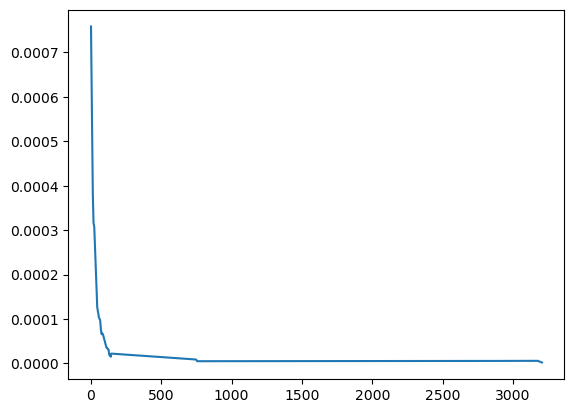

In [23]:
plt.plot(MFADate_listW2,MFflux_listW2)

In [24]:
MFMag_listW2 = u.Magnitude(MFflux_listW2.to(u.AB)) 
print(MFMag_listW2)
print(MFflux_listW2)
print(MFADate_listW2)

[16.7  16.8  17.45 17.65 17.68 18.65 18.74 18.81 18.85 18.89 18.93 19.21
 19.36 19.32 19.37 20.03 20.05 20.13 20.17 20.7  20.97 20.55 21.56 21.71
 22.21 22.07 22.03 23.21] mag(AB)
[7.58577575e-04 6.91830971e-04 3.80189396e-04 3.16227766e-04
 3.07609681e-04 1.25892541e-04 1.15877736e-04 1.08642562e-04
 1.04712855e-04 1.00925289e-04 9.72747224e-05 7.51622894e-05
 6.54636174e-05 6.79203633e-05 6.48634434e-05 3.53183170e-05
 3.46736850e-05 3.22106879e-05 3.10455959e-05 1.90546072e-05
 1.48593564e-05 2.18776162e-05 8.62978548e-06 7.51622894e-06
 4.74241985e-06 5.39510623e-06 5.59757601e-06 1.88799135e-06] Jy
[0.00000000e+00 2.13245500e+00 1.28327200e+01 1.78647310e+01
 2.30203660e+01 4.42510380e+01 4.94780160e+01 5.38204380e+01
 5.46900720e+01 5.93142090e+01 6.48783110e+01 7.06125620e+01
 7.52842000e+01 7.86145440e+01 8.52807550e+01 1.09782394e+02
 1.14606596e+02 1.19539541e+02 1.24571154e+02 1.29768747e+02
 1.41013693e+02 1.43844501e+02 7.44910268e+02 7.50430064e+02
 7.54419928e+02 2.90583

(-5.0, 200.0)

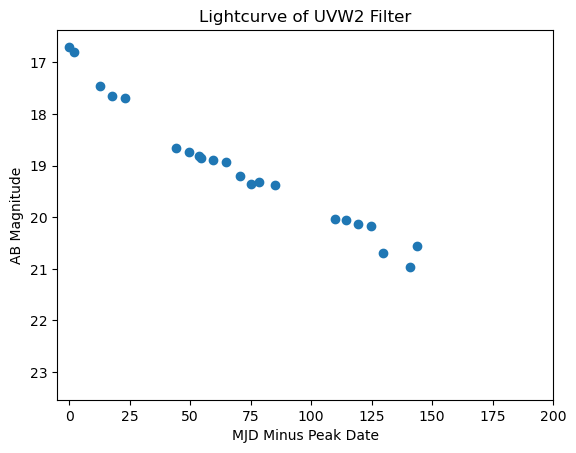

In [25]:
plt.scatter(MFADate_listW2,MFMag_listW2)
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.title("Lightcurve of UVW2 Filter")
plt.xlim(-5,200)

[0.0008550667128846805, 0.0008394599865193963, 0.0005345643593969647, 0.0004613175745603772, 0.00038018939632055966, 0.0001445439770745928, 0.00014588142602753413, 0.00010665961212302457, 0.00010665961212302457, 9.817479430199703e-05, 8.09095899178378e-05, 6.792036326171802e-05, 4.017908108489358e-05, 6.251726927756797e-05, 3.908408957923977e-05, 5.011872336272714e-05, 2.4210290467361603e-05, 2.6302679918953702e-05, 3.019951720402019e-05, 2.228435149270298e-05, 3.076096814740705e-05, 1.541700452949555e-05, 2.187761623949534e-05, 2.5822601906345904e-06, 2.6302679918953707e-06, 5.970352865838317e-06, 1.137627285823424e-05, 1.0864256236170688e-06, 1.7060823890031207e-05, 4.285485203974374e-06, 6.251726927756797e-06]


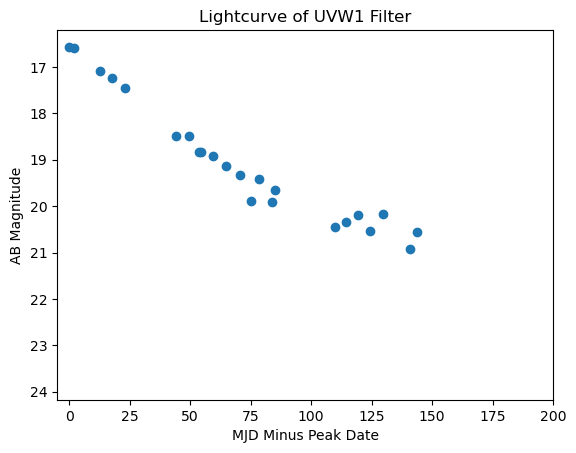

In [26]:
Mflux_listW1 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW1.uvot':
        Mflux_listW1.append(data['lightcurve']["data"][i][2])
MDate_listW1 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW1.uvot':
        MDate_listW1.append(data['lightcurve']["data"][i][0])
MFflux_listW1 = u.Jy * np.array(Mflux_listW1)
MFDate_listW1 = np.array(MDate_listW1)
MFMag_listW1 = u.Magnitude(MFflux_listW1.to(u.AB)) 
MFADate_listW1 = MFDate_listW1 - MFDate_listW1[0]
plt.scatter(MFADate_listW1,MFMag_listW1)
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.title("Lightcurve of UVW1 Filter")
plt.xlim(-5,200)
print(Mflux_listW1)

(-5.0, 200.0)

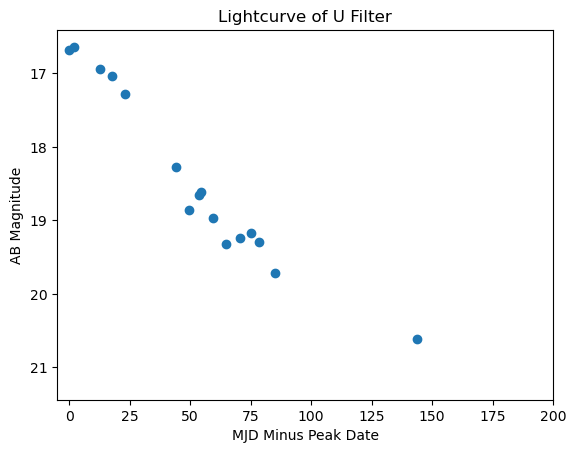

In [27]:
Mflux_listU = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'U.uvot':
        Mflux_listU.append(data['lightcurve']["data"][i][2])
MDate_listU = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'U.uvot':
        MDate_listU.append(data['lightcurve']["data"][i][0])
MFflux_listU = u.Jy * np.array(Mflux_listU)
MFDate_listU = np.array(MDate_listU)
MFMag_listU = u.Magnitude(MFflux_listU.to(u.AB)) 
MFADate_listU = MFDate_listU - MFDate_listU[0]
plt.scatter(MFADate_listU,MFMag_listU)
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.title("Lightcurve of U Filter")
plt.xlim(-5,200)

(-5.0, 200.0)

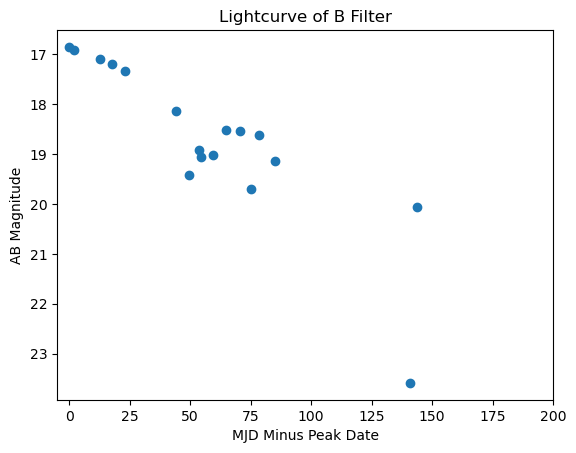

In [28]:
Mflux_listB = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'B.uvot':
        Mflux_listB.append(data['lightcurve']["data"][i][2])
MDate_listB = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'B.uvot':
        MDate_listB.append(data['lightcurve']["data"][i][0])
MFflux_listB = u.Jy * np.array(Mflux_listB)
MFDate_listB = np.array(MDate_listB)
MFMag_listB = u.Magnitude(MFflux_listB.to(u.AB)) 
MFADate_listB = MFDate_listB - MFDate_listB[0]
plt.scatter(MFADate_listB,MFMag_listB)
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.title("Lightcurve of B Filter")
plt.xlim(-5,200)

(-5.0, 200.0)

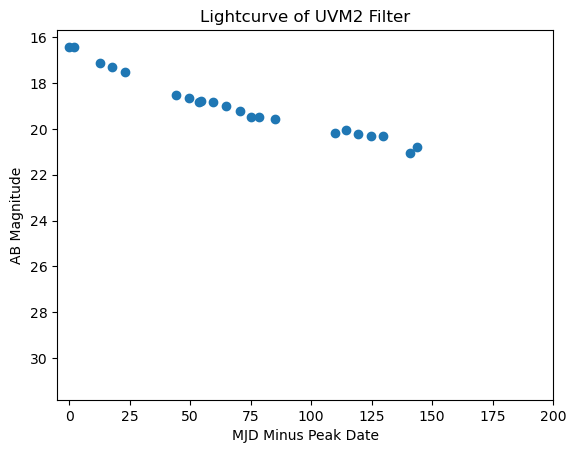

In [29]:
Mflux_listM2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVM2.uvot':
        Mflux_listM2.append(data['lightcurve']["data"][i][2])
MDate_listM2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVM2.uvot':
        MDate_listM2.append(data['lightcurve']["data"][i][0])
MFflux_listM2 = u.Jy * np.array(Mflux_listM2)
MFDate_listM2 = np.array(MDate_listM2)
MFMag_listM2 = u.Magnitude(MFflux_listM2.to(u.AB)) 
MFADate_listM2 = MFDate_listM2 - MFDate_listM2[0]
plt.scatter(MFADate_listM2,MFMag_listM2)
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.title("Lightcurve of UVM2 Filter")
plt.xlim(-5,200)

(25.0, 15.686500000000013)

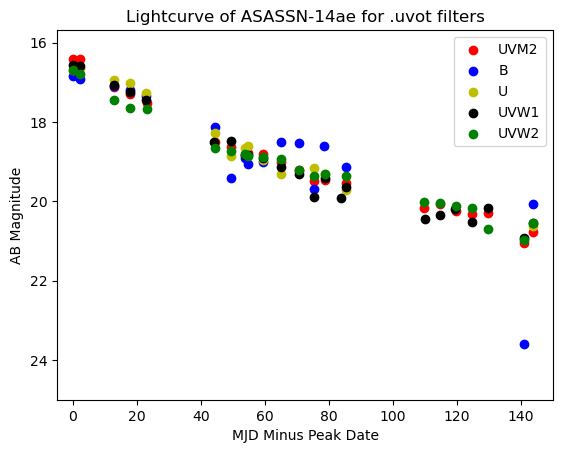

In [30]:
plt.scatter(MFADate_listM2,MFMag_listM2,c = 'r', label = 'UVM2')
plt.scatter(MFADate_listB,MFMag_listB,c = 'b', label = 'B')
plt.scatter(MFADate_listU,MFMag_listU,c = 'y', label = 'U')
plt.scatter(MFADate_listW1,MFMag_listW1,c = 'k', label = 'UVW1')
plt.scatter(MFADate_listW2,MFMag_listW2,c = 'g', label = 'UVW2')
plt.gca().invert_yaxis()
plt.xlabel("MJD Minus Peak Date")
plt.ylabel("AB Magnitude")
plt.legend()
plt.title("Lightcurve of ASASSN-14ae for .uvot filters")
plt.xlim(-5,150)
plt.ylim(25)

In [31]:
Mer_listB = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'B.uvot':
        Mer_listB.append(data['lightcurve']["data"][i][3])
Mer_listM2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVM2.uvot':
        Mer_listM2.append(data['lightcurve']["data"][i][3])
Mer_listU = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'U.uvot':
        Mer_listU.append(data['lightcurve']["data"][i][3])
Mer_listW1 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW1.uvot':
        Mer_listW1.append(data['lightcurve']["data"][i][3])
Mer_listW2 = []
for i in range (len(data['lightcurve']["data"])):
    if data['lightcurve']["data"][i][1] == 'UVW2.uvot':
        Mer_listW2.append(data['lightcurve']["data"][i][3])
MFer_listM2 = u.Jy * np.array(Mer_listM2)
MFMager_listM2 = u.Magnitude(MFer_listM2.to(u.AB)) 
MFer_listB = u.Jy * np.array(Mer_listB)
MFMager_listB = u.Magnitude(MFer_listB.to(u.AB)) 
MFer_listW2 = u.Jy * np.array(Mer_listW2)
MFMager_listW2 = u.Magnitude(MFer_listW2.to(u.AB)) 
MFer_listW1 = u.Jy * np.array(Mer_listW1)
MFMager_listW1 = u.Magnitude(MFer_listW1.to(u.AB)) 
MFer_listU = u.Jy * np.array(Mer_listU)
MFMager_listU = u.Magnitude(MFer_listU.to(u.AB)) 
print(MFer_listM2)

[4.26367714e-05 4.26367714e-05 2.21709504e-05 2.36970522e-05
 2.68424628e-05 9.41619775e-06 1.53150001e-05 6.94825215e-06
 6.06309432e-06 8.25700143e-06 1.07923745e-05 5.71244932e-06
 7.00030569e-06 5.18578261e-06 5.96656423e-06 4.38195257e-06
 3.35711972e-06 3.47629805e-06 3.52294259e-06 3.92344593e-06
 4.04657957e-06 3.10344678e-06 2.14751181e-06 1.86626628e-06
 2.41058427e-06 3.12671347e-06 3.44227509e-06 2.50543045e-06
 1.97146434e-06 4.27837239e-06 9.43609234e-06] Jy


In [32]:
ptimeM2 = MFADate_listM2*np.sqrt(1-z**2)
ptimeB = MFADate_listB*np.sqrt(1-z**2)
ptimeU = MFADate_listU*np.sqrt(1-z**2)
ptimeW1 = MFADate_listW1*np.sqrt(1-z**2)
ptimeW2 = MFADate_listW2*np.sqrt(1-z**2)
print(ptimeM2)
print(MFADate_listM2)

[0.00000000e+00 2.12197496e+00 1.28152314e+01 1.78390269e+01
 2.29885287e+01 4.42002170e+01 4.94208791e+01 5.37646470e+01
 5.46337606e+01 5.92492199e+01 6.48072049e+01 7.05366806e+01
 7.52052183e+01 7.85307665e+01 8.51907205e+01 1.09672338e+02
 1.14487389e+02 1.19414471e+02 1.24446907e+02 1.29636285e+02
 1.40870771e+02 1.43701324e+02 4.09321998e+02 4.37142465e+02
 4.77227266e+02 7.44192588e+02 7.49706162e+02 7.53695491e+02
 2.90307052e+03 3.17360636e+03 3.73121488e+03]
[0.00000000e+00 2.12399500e+00 1.28274310e+01 1.78560090e+01
 2.30104130e+01 4.42422940e+01 4.94679260e+01 5.38158290e+01
 5.46857700e+01 5.93056230e+01 6.48688990e+01 7.06038290e+01
 7.52768110e+01 7.86055250e+01 8.52718190e+01 1.09776742e+02
 1.14596377e+02 1.19528149e+02 1.24565376e+02 1.29759694e+02
 1.41004875e+02 1.43838122e+02 4.09711658e+02 4.37558609e+02
 4.77681569e+02 7.44901033e+02 7.50419855e+02 7.54412982e+02
 2.90583414e+03 3.17662752e+03 3.73476686e+03]


In [33]:
from astropy.cosmology import WMAP9 as cosmo
Ho = cosmo.H(0)  
from astropy.constants import c
from astropy.constants import e
print(Ho)
print(c)
sol = c.to(u.km/u.s)
print(sol)
print(z)

69.32 km / (Mpc s)
  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
299792.458 km / s
0.0436029


In [34]:
d = (sol*z)/Ho
print(d)
dpc = d.to(u.pc)
print(dpc)

188.5721374340479 Mpc
188572137.4340479 pc


In [35]:
dm = (5*np.log10(dpc/(10*u.pc)))
print(dm)

36.377387618767884


In [36]:
zero_point_star_equiv = u.zero_point_flux(3631.1 * u.Jy)
print(u.Magnitude(MFMag_listM2.to(u.AB, zero_point_star_equiv)))
print(MFMag_listM2)

[16.42 16.42 17.13 17.3  17.53 18.5  18.63 18.83 18.78 18.81 19.01 19.21
 19.48 19.46 19.55 20.17 20.06 20.24 20.32 20.29 21.05 20.77 21.61 22.37
 21.69 21.33 21.34 21.61 22.23 31.09 22.48] mag(AB)
[16.42 16.42 17.13 17.3  17.53 18.5  18.63 18.83 18.78 18.81 19.01 19.21
 19.48 19.46 19.55 20.17 20.06 20.24 20.32 20.29 21.05 20.77 21.61 22.37
 21.69 21.33 21.34 21.61 22.23 31.09 22.48] mag(AB)


In [37]:
AbsMagM2 = MFMag_listM2.value - dm
AbsMagU = MFMag_listU.value - dm
AbsMagW2 = MFMag_listW2.value - dm
AbsMagW1 = MFMag_listW1.value - dm
AbsMagB = MFMag_listB.value - dm

(-10.0, -20.69088761876787)

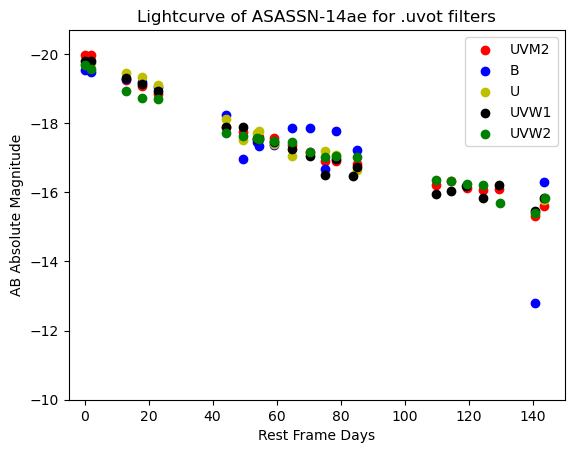

In [38]:
plt.scatter(ptimeM2,AbsMagM2,c = 'r', label = 'UVM2')
plt.scatter(ptimeB,AbsMagB,c = 'b', label = 'B')
plt.scatter(ptimeU,AbsMagU,c = 'y', label = 'U')
plt.scatter(ptimeW1,AbsMagW1,c = 'k', label = 'UVW1')
plt.scatter(ptimeW2,AbsMagW2,c = 'g', label = 'UVW2')
plt.gca().invert_yaxis()
plt.xlabel("Rest Frame Days")
plt.ylabel("AB Absolute Magnitude")
plt.legend()
plt.title("Lightcurve of ASASSN-14ae for .uvot filters")
plt.xlim(-5,150)
plt.ylim(-10)


In [39]:
MFer_listM2 = u.Jy * np.array(Mer_listM2)
MFMager_listM2 = u.Magnitude(MFer_listM2.to(u.AB)) 
MFer_listB = u.Jy * np.array(Mer_listB)
MFMager_listB = u.Magnitude(MFer_listB.to(u.AB)) 
MFer_listW2 = u.Jy * np.array(Mer_listW2)
MFMager_listW2 = u.Magnitude(MFer_listW2.to(u.AB)) 
MFer_listW1 = u.Jy * np.array(Mer_listW1)
MFMager_listW1 = u.Magnitude(MFer_listW1.to(u.AB)) 
MFer_listU = u.Jy * np.array(Mer_listU)
MFMager_listU = u.Magnitude(MFer_listU.to(u.AB)) 
print(MFMager_listM2)
print(MFer_listM2)
print(MFMag_listM2)

[19.82553922 19.82553922 20.53553922 20.46326419 20.3279441  21.46531107
 20.93720749 21.79531107 21.94326419 21.6079441  21.31720749 22.0079441
 21.78720749 22.11296423 21.9606892  22.29583082 22.58508293 22.54720749
 22.53273608 22.41583082 22.38227979 22.67038924 23.0701611  23.22256597
 22.94469421 22.66227979 22.55788606 22.90279412 23.16302768 22.32180354
 21.46301954] mag(AB)
[4.26367714e-05 4.26367714e-05 2.21709504e-05 2.36970522e-05
 2.68424628e-05 9.41619775e-06 1.53150001e-05 6.94825215e-06
 6.06309432e-06 8.25700143e-06 1.07923745e-05 5.71244932e-06
 7.00030569e-06 5.18578261e-06 5.96656423e-06 4.38195257e-06
 3.35711972e-06 3.47629805e-06 3.52294259e-06 3.92344593e-06
 4.04657957e-06 3.10344678e-06 2.14751181e-06 1.86626628e-06
 2.41058427e-06 3.12671347e-06 3.44227509e-06 2.50543045e-06
 1.97146434e-06 4.27837239e-06 9.43609234e-06] Jy
[16.42 16.42 17.13 17.3  17.53 18.5  18.63 18.83 18.78 18.81 19.01 19.21
 19.48 19.46 19.55 20.17 20.06 20.24 20.32 20.29 21.05 20.77 21.

In [40]:
-2.5*np.log10(4.26367714e-05/3631.1)

19.825634746166326

In [41]:
ErMagM2 = ((MFer_listM2/MFflux_listM2))
FErMagM2 = (np.abs(ErMagM2*AbsMagM2))
print(ErMagM2)

[4.34294482e-02 4.34294482e-02 4.34294482e-02 5.42868102e-02
 7.60015343e-02 6.51441723e-02 1.19430983e-01 6.51441723e-02
 5.42868102e-02 7.60015343e-02 1.19430983e-01 7.60015343e-02
 1.19430983e-01 8.68588964e-02 1.08573620e-01 1.41145707e-01
 9.77162584e-02 1.19430983e-01 1.30288345e-01 1.41145707e-01
 2.93148775e-01 1.73717793e-01 2.60576689e-01 4.56009206e-01
 3.14863499e-01 2.93148775e-01 3.25720861e-01 3.04006137e-01
 4.23437120e-01 3.21572263e+03 2.55148008e+00]


(-10.0, -30.0)

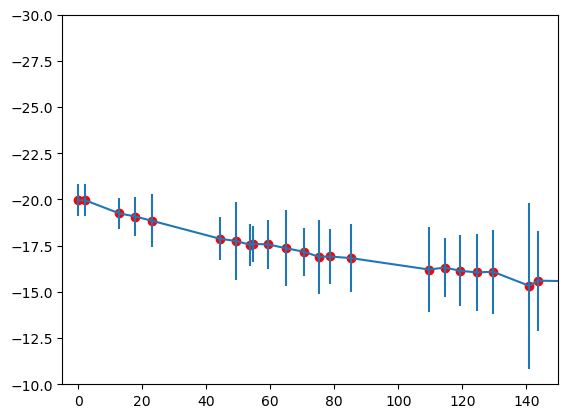

In [42]:
plt.scatter(ptimeM2,AbsMagM2,c = 'r', label = 'UVM2')
plt.errorbar(ptimeM2,AbsMagM2,FErMagM2)
plt.xlim(-5,150)
plt.ylim(-10,-30)

In [43]:
e_M2mag   = np.sqrt((2.5/np.log(10))*(MFer_listM2/MFflux_listM2)**2)
e_W2mag   = np.sqrt((2.5/np.log(10))*(MFer_listW2/MFflux_listW2)**2)
e_Bmag   = np.sqrt((2.5/np.log(10))*(MFer_listB/MFflux_listB)**2)
e_Umag   = np.sqrt((2.5/np.log(10))*(MFer_listU/MFflux_listU)**2)
e_W1mag   = np.sqrt((2.5/np.log(10))*(MFer_listW1/MFflux_listW1)**2)

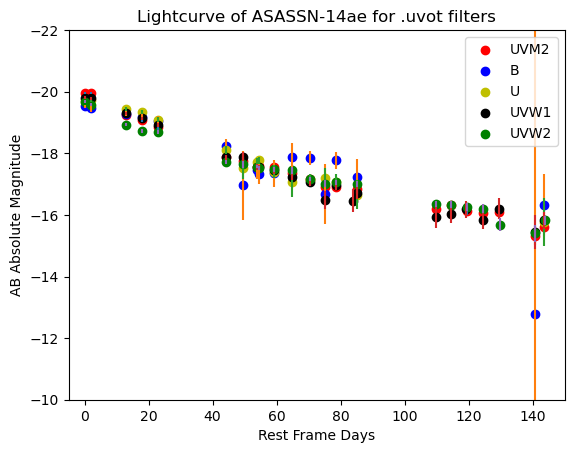

In [44]:
plt.scatter(ptimeM2,AbsMagM2,c = 'r', label = 'UVM2')
plt.errorbar(ptimeM2,AbsMagM2,yerr = e_M2mag,ls = 'none')
plt.scatter(ptimeB,AbsMagB,c = 'b', label = 'B')
plt.errorbar(ptimeB,AbsMagB,yerr = e_Bmag,ls = 'none')
plt.scatter(ptimeU,AbsMagU,c = 'y', label = 'U')
plt.errorbar(ptimeU,AbsMagU,yerr = e_Umag,ls = 'none')
plt.scatter(ptimeW1,AbsMagW1,c = 'k', label = 'UVW1')
plt.errorbar(ptimeW1,AbsMagW1,yerr = e_W1mag,ls = 'none')
plt.scatter(ptimeW2,AbsMagW2,c = 'g', label = 'UVW2')
plt.errorbar(ptimeW2,AbsMagW2,yerr = e_W2mag,ls = 'none')
plt.gca().invert_yaxis()
plt.xlabel("Rest Frame Days")
plt.ylabel("AB Absolute Magnitude")
plt.legend()
plt.title("Lightcurve of ASASSN-14ae for .uvot filters")
plt.xlim(-5,150)
plt.ylim(-10,-22)
plt.savefig('ASASSN-14ae_lightcurve_uvot.pdf')

In [45]:
print(AbsMagB)
print(e_Bmag)

[-19.52738762 -19.46738762 -19.28738762 -19.18738762 -19.03738762
 -18.23738762 -16.96738762 -17.45738762 -17.32738762 -17.35738762
 -17.86738762 -17.84738762 -16.67738762 -17.76738762 -17.23738762
 -12.78738762 -16.30738762 -14.07738762 -16.51738762 -16.29738762
 -16.22738762]
[ 0.05656613  0.11313226  0.07919259  0.10181904  0.1696984   0.2149513
  1.12000942  0.29414389  0.32808357  0.44121583  0.45252906  0.22626453
  0.97293747  0.28283066  0.56566132 33.89442642  1.00687715  6.53904488
  0.41858938  1.28970781  1.73092365]


(-10.0, -22.0)

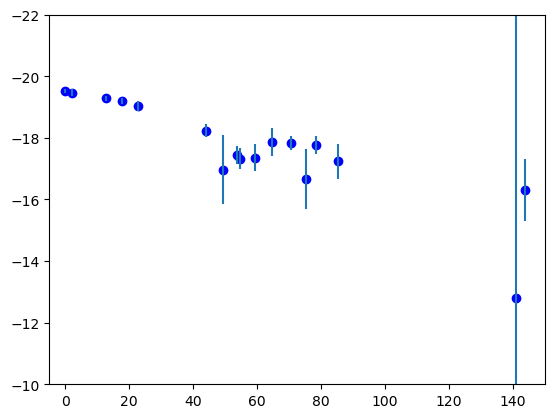

In [46]:
plt.scatter(ptimeB,AbsMagB,c = 'b', label = 'B')
plt.errorbar(ptimeB,AbsMagB,yerr = e_Bmag,ls = 'none')
plt.gca().invert_yaxis()
plt.xlim(-5,150)
plt.ylim(-10,-22)

In [47]:
print(MFer_listB)
print(MFflux_listB)

[3.58669398e-05 6.78772627e-05 4.02552344e-05 4.72026987e-05
 6.85197199e-05 4.15410932e-05 6.71984901e-05 2.77139014e-05
 2.74234644e-05 3.79130678e-05 6.21991302e-05 3.05319341e-05
 4.46912777e-05 3.54539256e-05 4.35205449e-05 4.32778950e-05
 3.28938211e-05 2.73937923e-05 1.65930432e-05 4.17473748e-05
 5.25310100e-05] Jy
[6.60693448e-04 6.25172693e-04 5.29663444e-04 4.83058802e-04
 4.20726628e-04 2.01372425e-04 6.25172693e-05 9.81747943e-05
 8.70963590e-05 8.95364766e-05 1.43218790e-04 1.40604752e-04
 4.78630092e-05 1.30617089e-04 8.01678063e-05 1.33045442e-06
 3.40408190e-05 4.36515832e-06 4.13047502e-05 3.37287309e-05
 3.16227766e-05] Jy


In [48]:
print(min(MFflux_listB))
print(max(AbsMagB))

1.3304544179780873e-06 Jy
-12.787387618767884


In [49]:
print(MFer_listB[15])
print(MFflux_listB[15])
print(AbsMagB[15])
print(e_Bmag[15])

4.3277895010161266e-05 Jy
1.3304544179780873e-06 Jy
-12.787387618767884
33.89442642367727


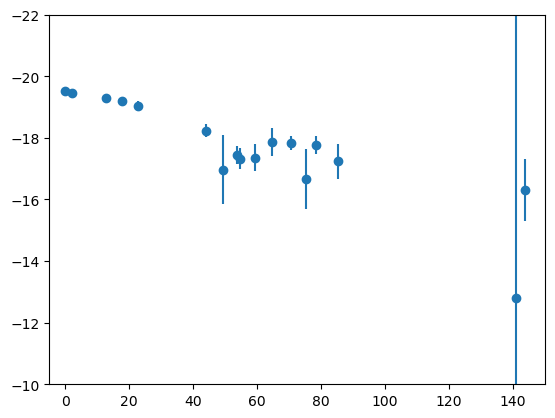

In [50]:
x = ptimeB
y = AbsMagB
y_err = e_Bmag
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=y_err, fmt='o')
plt.gca().invert_yaxis()
plt.xlim(-5,150)
plt.ylim(-10,-22)
plt.show()


In [51]:
print(MFer_listB[15]/MFflux_listB[15])

32.528656694553554


In [52]:
data.keys()

dict_keys(['name', 'catalog_version', 'catalog_creation_date', 'ra', 'dec', 'z', 'peak_year', 'peak_mjd', 'peak_limit', 'spectral_type', 'spectral_subtype', 'paper_ref', 'nickname', 'extinction', 'host', 'lightcurve'])

In [53]:
data.items()

dict_items([('name', 'ASASSN-14ae'), ('catalog_version', 'v0.4'), ('catalog_creation_date', 'June-2024'), ('ra', 167.1671635), ('dec', 34.09784698), ('z', 0.0436029), ('peak_year', 2014.07374388), ('peak_mjd', 56684.91651619998), ('peak_limit', True), ('spectral_type', 'H'), ('spectral_subtype', '->H+He'), ('paper_ref', '2014MNRAS.445.3263H'), ('nickname', 'ASASSN-14ae'), ('extinction', {'note': '\nExinction due to Galatic absorption to be applied to the TDE light.\nE(B-V) based on from maps of Schlegel, Finkbeiner & Davis (1998).\nWe use a blackbody with T=3e4K to find the linear extinction in each optical/UV band (similar to A_nu), \nwe also give the ratio of total-to-selective extinction (R_nu)\n', 'e_bv': 0.014917281092303657, 'linear_extinction': {'FUV': 0.8929992780130005, 'NUV': 0.8921094800776839, 'u.sdss': 0.9345621809637065, 'g.sdss': 0.9483277753943016, 'r.sdss': 0.9629308756570525, 'i.sdss': 0.9713945287592197, 'z.sdss': 0.9790472281429085, 'F150LP': 0.8954700171872065, 'F1

In [54]:
data.values()

dict_values(['ASASSN-14ae', 'v0.4', 'June-2024', 167.1671635, 34.09784698, 0.0436029, 2014.07374388, 56684.91651619998, True, 'H', '->H+He', '2014MNRAS.445.3263H', 'ASASSN-14ae', {'note': '\nExinction due to Galatic absorption to be applied to the TDE light.\nE(B-V) based on from maps of Schlegel, Finkbeiner & Davis (1998).\nWe use a blackbody with T=3e4K to find the linear extinction in each optical/UV band (similar to A_nu), \nwe also give the ratio of total-to-selective extinction (R_nu)\n', 'e_bv': 0.014917281092303657, 'linear_extinction': {'FUV': 0.8929992780130005, 'NUV': 0.8921094800776839, 'u.sdss': 0.9345621809637065, 'g.sdss': 0.9483277753943016, 'r.sdss': 0.9629308756570525, 'i.sdss': 0.9713945287592197, 'z.sdss': 0.9790472281429085, 'F150LP': 0.8954700171872065, 'F125LP': 0.8851856663113998, 'F225W': 0.8919831890818992, 'I.johnson': 0.9772412097022964, 'J': 0.9876316483799189, 'H': 0.9921727640612082, 'K': 0.9949070823534961, 'V.uvot': 0.9573537091176234, 'B.uvot': 0.94397

36.377387618767884


(None, <ErrorbarContainer object of 3 artists>)

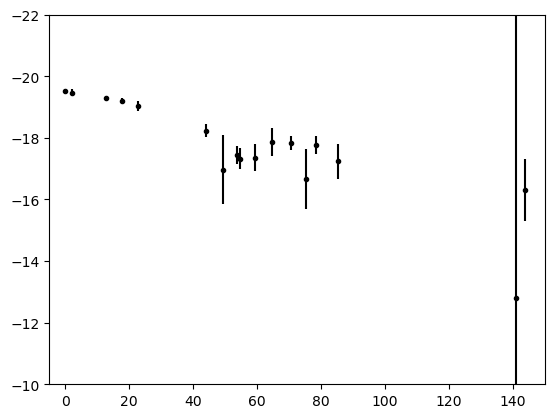

In [55]:
def filtercurve(lightfilter,redshift):
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    for i in range (len(data['lightcurve']["data"])):
        if data['lightcurve']["data"][i][1] == lightfilter:
            flux_filter.append(data['lightcurve']["data"][i][2])
            error_filter.append(data['lightcurve']["data"][i][3])
            mjd_date_filter.append(data['lightcurve']["data"][i][0])
    distance = (sol*redshift)/Ho
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    flux_filter = u.Jy*np.array(flux_filter)
    mag_filter = u.Magnitude(flux_filter.to(u.AB))     
    absMag_filter = mag_filter.value - distance_mod
    flux_error_filter = u.Jy * np.array(error_filter)
    mjd_date_filter= np.array(mjd_date_filter)
    peak_date_filter = mjd_date_filter - mjd_date_filter[0]
    rest_time_filter = peak_date_filter*np.sqrt(1-redshift**2)
    mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2)    
    lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='k.')
    plt.gca().invert_yaxis()
    plt.xlim(-5,150)
    plt.ylim(-10,-22)
    return(print(distance_mod),lightcurve)
filtercurve('B.uvot',z)

In [56]:
def filtercurve(lightfilter,redshift):
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    for i in range (len(data['lightcurve']["data"])):
        if data['lightcurve']["data"][i][1] == '{}'.format(lightfilter):
            flux_filter_array = np.array(u.Jy*flux_filter.append(data['lightcurve']["data"][i][2]))
            mag_filter = u.Magnitude(flux_filter_array.to(u.AB)) 
            distance = (sol*redshift)/Ho
            distance_pc = d.to(u.pc)
            distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
            absMag_filter = mag_filter.value - distance_mod
            error_filter =  error_filter.append(data['lightcurve']["data"][i][3])
            flux_error_filter = u.Jy * np.array(error_filter)
            mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2)    
            mjd_date_filter= np.array(mjd_date_filter.append(data['lightcurve']["data"][i][0]))
            peak_date_filter = mjd_date_filter - mjd_date_filter[0]
            rest_time_filter = peak_date_filter*np.sqrt(1-redshift**2)
            lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='k.')
            return(lightcurve)
filtercurve('B',z)

In [57]:
AbsMagB.to_value()

array([-19.52738762, -19.46738762, -19.28738762, -19.18738762,
       -19.03738762, -18.23738762, -16.96738762, -17.45738762,
       -17.32738762, -17.35738762, -17.86738762, -17.84738762,
       -16.67738762, -17.76738762, -17.23738762, -12.78738762,
       -16.30738762, -14.07738762, -16.51738762, -16.29738762,
       -16.22738762])

In [58]:
ASSA14_Mag_list = (AbsMagB.to_value(),AbsMagU.to_value(),AbsMagM2.to_value(),AbsMagW1.to_value(),AbsMagW2.to_value())
ASSA14_Mag_list
ASSA14_Freq_list = data['lightcurve']['frequency_Hz'][0:5]
ASSA14_Freq_list = ASSA14_Freq_list
ASSA14_Mag_list[0]

array([-19.52738762, -19.46738762, -19.28738762, -19.18738762,
       -19.03738762, -18.23738762, -16.96738762, -17.45738762,
       -17.32738762, -17.35738762, -17.86738762, -17.84738762,
       -16.67738762, -17.76738762, -17.23738762, -12.78738762,
       -16.30738762, -14.07738762, -16.51738762, -16.29738762,
       -16.22738762])

In [59]:
ASSA14_wave_list = (np.array(ASSA14_Freq_list) * u.Hz).to(u.nm, equivalencies=u.spectral())
ASSA14_wave_list

<Quantity [431.181994  , 343.47752409, 222.64833267, 250.05813166,
           200.84444466] nm>

In [60]:
ASSA14_Aflux = []
for x in range(0,5):
    ASSA14_Aflux.append(10**((ASSA14_Mag_list[x]-8.9)/(-2.5)))
ASSA14_Aflux

[array([2.34938963e+11, 2.22307977e+11, 1.88345413e+11, 1.71773058e+11,
        1.49608079e+11, 7.16069288e+10, 2.22307977e+10, 3.49104179e+10,
        3.09709871e+10, 3.18386795e+10, 5.09278155e+10, 4.99982781e+10,
        1.70198233e+10, 4.64467197e+10, 2.85072318e+10, 4.73102287e+08,
        1.21047283e+10, 1.55222634e+09, 1.46877424e+10, 1.19937515e+10,
        1.12448858e+10]),
 array([2.74760974e+11, 2.85072318e+11, 2.16249468e+11, 1.99046730e+11,
        1.58108438e+11, 6.35265174e+10, 3.68939409e+10, 4.43562730e+10,
        4.64467197e+10, 3.33391903e+10, 2.41521083e+10, 2.59989044e+10,
        2.77303306e+10, 2.46011295e+10, 1.67091765e+10, 7.36130899e+09,
        4.23599118e+09, 4.27518633e+09]),
 array([3.49104179e+11, 3.49104179e+11, 1.81532775e+11, 1.55222634e+11,
        1.25589996e+11, 5.13990447e+10, 4.55989715e+10, 3.79275725e+10,
        3.97150440e+10, 3.86326987e+10, 3.21332792e+10, 2.67272975e+10,
        2.08427513e+10, 2.12302470e+10, 1.95413718e+10, 1.10396435e+

In [61]:
10**((-19.52738762-8.9)/(-2.5))

234938963279.73947

In [62]:
MFflux_listB[1]

<Quantity 0.00062517 Jy>

In [63]:
-2.5*np.log10(.00062517269/3631)

16.91006562710276

In [64]:
36.377387618767884 + AbsMagB[1]

<Quantity 16.91>

[array([2.34938963e+11, 2.22307977e+11, 1.88345413e+11, 1.71773058e+11,
       1.49608079e+11]), array([2.74760974e+11, 2.85072318e+11, 2.16249468e+11, 1.99046730e+11,
       1.58108438e+11]), array([3.49104179e+11, 3.49104179e+11, 1.81532775e+11, 1.55222634e+11,
       1.25589996e+11]), array([3.04057029e+11, 2.98507363e+11, 1.90088152e+11, 1.64041997e+11,
       1.35193262e+11]), array([2.69746021e+11, 2.46011295e+11, 1.35193262e+11, 1.12448858e+11,
       1.09384314e+11])]
[1.93394698e+11 2.26647586e+11 2.32110753e+11 2.18377560e+11
 1.74556750e+11]
[431.181994   343.47752409 222.64833267 250.05813166 200.84444466]


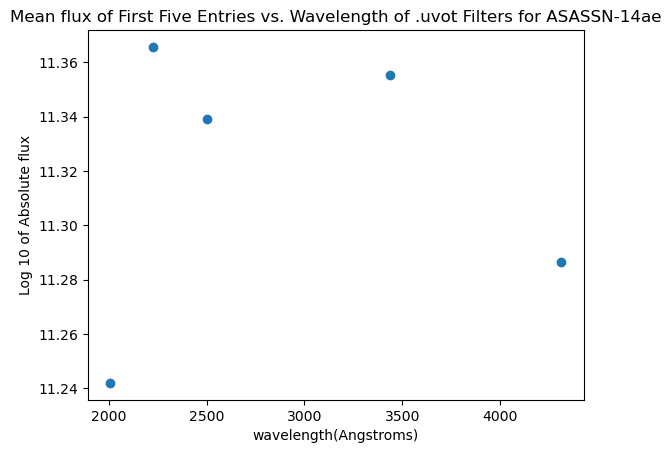

In [65]:
#take first 5 entries of each abs flux array and make their mean 
#plot the means vs. wavelengths
abs_flux_bin = []
abs_flux_mean = []
for t in range(0,5):
    abs_flux_bin.append(ASSA14_Aflux[t][:5])
    abs_flux_mean.append(np.mean(abs_flux_bin[t]))
plt.scatter((ASSA14_wave_list.to(u.angstrom)).to_value(),np.log10(np.array(abs_flux_mean)))
plt.xlabel('wavelength(Angstroms)')
plt.ylabel('Log 10 of Absolute flux')
plt.title('Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-14ae')
print(abs_flux_bin)
print(np.array(abs_flux_mean))
print((ASSA14_wave_list.to_value()))
    

In [66]:
print(ptimeM2)
print(ptimeU)
print(ptimeB)
print(ptimeW2)
print(ptimeW1)

[0.00000000e+00 2.12197496e+00 1.28152314e+01 1.78390269e+01
 2.29885287e+01 4.42002170e+01 4.94208791e+01 5.37646470e+01
 5.46337606e+01 5.92492199e+01 6.48072049e+01 7.05366806e+01
 7.52052183e+01 7.85307665e+01 8.51907205e+01 1.09672338e+02
 1.14487389e+02 1.19414471e+02 1.24446907e+02 1.29636285e+02
 1.40870771e+02 1.43701324e+02 4.09321998e+02 4.37142465e+02
 4.77227266e+02 7.44192588e+02 7.49706162e+02 7.53695491e+02
 2.90307052e+03 3.17360636e+03 3.73121488e+03]
[  0.           2.10066624  12.78922012  17.88862367  22.92808129
  44.17927492  49.40204503  53.73750183  54.60616489  59.22811696
  64.78739273  70.51598731  75.18236109  78.51049683  85.17014208
 143.67681783 744.1726184  749.68572113]
[0.00000000e+00 2.09986900e+00 1.27888395e+01 1.78876736e+01
 2.29274009e+01 4.41784257e+01 4.94010380e+01 5.37372161e+01
 5.46058951e+01 5.92272967e+01 6.47864546e+01 7.05151261e+01
 7.51816787e+01 7.85096137e+01 8.51692290e+01 1.40849239e+02
 1.43676258e+02 7.53670892e+02 2.90304300e+

In [67]:
ASSA14_wave_list.to(u.angstrom)

<Quantity [4311.81994004, 3434.77524091, 2226.48332671, 2500.58131664,
           2008.44444658] Angstrom>

[array([2.34938963e+11, 2.22307977e+11, 1.88345413e+11, 1.71773058e+11,
       1.49608079e+11]), array([2.74760974e+11, 2.85072318e+11, 2.16249468e+11, 1.99046730e+11,
       1.58108438e+11]), array([3.49104179e+11, 3.49104179e+11, 1.81532775e+11, 1.55222634e+11,
       1.25589996e+11]), array([3.04057029e+11, 2.98507363e+11, 1.90088152e+11, 1.64041997e+11,
       1.35193262e+11]), array([2.69746021e+11, 2.46011295e+11, 1.35193262e+11, 1.12448858e+11,
       1.09384314e+11])]
[1.93394698e+11 2.26647586e+11 2.32110753e+11 2.18377560e+11
 1.74556750e+11]
[431.181994   343.47752409 222.64833267 250.05813166 200.84444466]


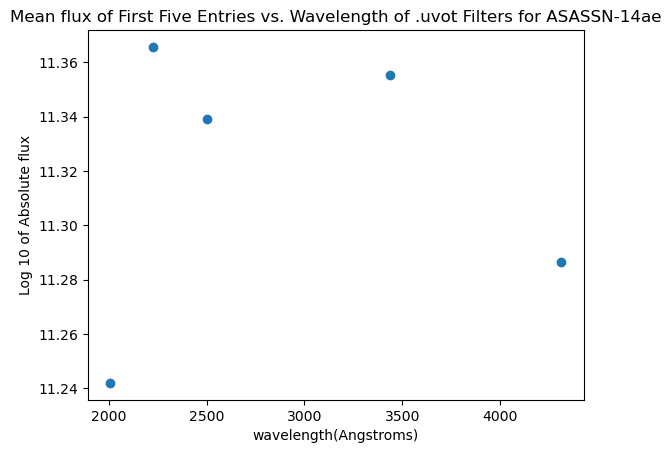

In [68]:
ASSA14_Mag_list = (AbsMagB.to_value(),AbsMagU.to_value(),AbsMagM2.to_value(),AbsMagW1.to_value(),AbsMagW2.to_value())
ASSA14_Mag_list
ASSA14_Freq_list = data['lightcurve']['frequency_Hz'][0:5]
ASSA14_Freq_list = ASSA14_Freq_list
ASSA14_Aflux = []
for x in range(0,5):
    ASSA14_Aflux.append(10**((ASSA14_Mag_list[x]-8.9)/(-2.5)))
ASSA14_Aflux
abs_flux_bin = []
abs_flux_mean = []
for t in range(0,5):
    abs_flux_bin.append(ASSA14_Aflux[t][:5])
    abs_flux_mean.append(np.mean(abs_flux_bin[t]))
plt.scatter((ASSA14_wave_list.to(u.angstrom)).to_value(),np.log10(np.array(abs_flux_mean)))
plt.xlabel('wavelength(Angstroms)')
plt.ylabel('Log 10 of Absolute flux')
plt.title('Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-14ae')
print(abs_flux_bin)
print(np.array(abs_flux_mean))
print((ASSA14_wave_list.to_value()))

In [69]:
with open("/Users/snorris/manyTDE/data/sources/ASASSN-14li.json") as f1:
    data1 = json.load(f1)
data1['lightcurve']['filters'][1]

'U.uvot'

In [70]:
Oflux_listB = []
for i in range (len(data1['lightcurve']["data"])):
    if data1['lightcurve']["data"][i][1] == data1['lightcurve']['filters'][0]:
        Oflux_listB.append(data1['lightcurve']["data"][i][2])
Oflux_listU = []
for i in range (len(data1['lightcurve']["data"])):
    if data1['lightcurve']["data"][i][1] == data1['lightcurve']['filters'][1]:
        Oflux_listU.append(data1['lightcurve']["data"][i][2])       
Oflux_listM2 = []
for i in range (len(data1['lightcurve']["data"])):
    if data1['lightcurve']["data"][i][1] == data1['lightcurve']['filters'][2]:
        Oflux_listM2.append(data1['lightcurve']["data"][i][2])       
Oflux_listW1 = []
for i in range (len(data1['lightcurve']["data"])):
    if data1['lightcurve']["data"][i][1] == data1['lightcurve']['filters'][3]:
        Oflux_listW1.append(data1['lightcurve']["data"][i][2])
Oflux_listW2 = []
for i in range (len(data1['lightcurve']["data"])):
    if data1['lightcurve']["data"][i][1] == data1['lightcurve']['filters'][4]:
        Oflux_listW2.append(data1['lightcurve']["data"][i][2])
Oflux_listB

[0.0006367955209079083,
 0.0006486344335482348,
 0.0006918309709189305,
 0.0006137620051647895,
 0.0004920395356814431,
 0.0005445026528424219,
 0.0005445026528424219,
 0.0004325138310350079,
 0.00047424198526024283,
 0.0003435579478998757,
 0.00033113112148258807,
 0.00040550853544838095,
 0.00029107171180665957,
 0.00036307805477010324,
 0.00016292960326397214,
 0.0002488857318282375,
 0.0002606153549998876,
 0.00023120647901755798,
 0.00018535316234148143,
 0.00019769696401118416,
 0.00023768402866248636,
 0.00027039583641088347,
 0.00018535316234148143,
 0.00019952623149688666,
 0.00020511621788255543,
 0.0001472312502432716,
 0.00020137242498623648,
 0.00012022644346174081,
 0.0001258925411794161,
 0.00011481536214968886,
 5.011872336272714e-05,
 1.8535316234148142e-05,
 3.467368504525281e-06,
 2.7542287033381518e-05,
 8.629785477669702e-05,
 2.3768402866248635e-05,
 4.3651583224016295e-05,
 0.00013061708881318296,
 2.6546055619755363e-05,
 2.2080047330188876e-05]

In [71]:
li_wave_list = (np.array(data1['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())[0:5]
li_wave_list

<Quantity [4311.81994004, 3434.77524091, 2226.48332671, 2500.58131664,
           2008.44444658] Angstrom>

In [72]:
data1['z']

0.0205778

In [73]:
d1 = (sol*data1['z'])/Ho
print(d1)
dpc1 = d1.to(u.pc)
print(dpc1)
dm1 = (5*np.log10(dpc1/(10*u.pc)))
print(dm1)

88.99407446959609 Mpc
88994074.46959609 pc
34.746805453964534


In [74]:
Oappmag_listB = u.Magnitude((np.array(Oflux_listB)*u.Jy).to(u.AB))
Oappmag_listU = u.Magnitude((np.array(Oflux_listU)*u.Jy).to(u.AB))
Oappmag_listM2 = u.Magnitude((np.array(Oflux_listM2)*u.Jy).to(u.AB))
Oappmag_listW1 = u.Magnitude((np.array(Oflux_listW1)*u.Jy).to(u.AB))
Oappmag_listW2 = u.Magnitude((np.array(Oflux_listW2)*u.Jy).to(u.AB))

In [75]:
Oabmag_listB = Oappmag_listB.value-dm1
Oabmag_listU = Oappmag_listU.value-dm1
Oabmag_listM2 = Oappmag_listM2.value-dm1
Oabmag_listW1 = Oappmag_listW1.value-dm1
Oabmag_listW2 = Oappmag_listW2.value-dm1

In [76]:
Oappmag_listU

<Magnitude [16.53, 16.63, 16.6 , 16.65, 16.72, 16.89, 16.94, 17.  , 16.96,
            17.11, 17.21, 17.17, 17.42, 17.6 , 17.51, 17.7 , 17.67, 17.74,
            17.78, 17.66, 17.72, 17.85, 17.81, 17.8 , 18.  , 17.88, 17.97,
            18.03, 18.24, 18.35, 18.62, 18.5 , 18.7 , 19.02, 18.9 , 18.99,
            19.19, 19.16, 19.42, 19.87, 19.3 , 19.98, 19.89, 19.71, 20.33,
            19.49, 19.83, 19.98, 19.9 , 19.29, 18.98, 19.76, 20.98, 19.49,
            20.46, 20.26, 20.87, 20.6 , 20.94, 19.91, 20.46, 19.89, 20.3 ,
            20.47, 21.95, 20.77, 25.58, 21.23, 22.51, 20.85, 20.19, 20.85,
            20.72, 20.53, 22.22, 19.5 , 22.72, 19.73, 22.39, 21.97] mag(AB)>

In [77]:
Oabmag_listB

<Quantity [-17.85680545, -17.87680545, -17.94680545, -17.81680545,
           -17.57680545, -17.68680545, -17.68680545, -17.43680545,
           -17.53680545, -17.18680545, -17.14680545, -17.36680545,
           -17.00680545, -17.24680545, -16.37680545, -16.83680545,
           -16.88680545, -16.75680545, -16.51680545, -16.58680545,
           -16.78680545, -16.92680545, -16.51680545, -16.59680545,
           -16.62680545, -16.26680545, -16.60680545, -16.04680545,
           -16.09680545, -15.99680545, -15.09680545, -14.01680545,
           -12.19680545, -14.44680545, -15.68680545, -14.28680545,
           -14.94680545, -16.13680545, -14.40680545, -14.20680545]>

In [78]:
li_Mag_list = (Oabmag_listB.to_value(),Oabmag_listU.to_value(),Oabmag_listM2.to_value(),Oabmag_listW1.to_value(),Oabmag_listW2.to_value())
li_Aflux = []
for x in range(0,5):
    li_Aflux.append(10**((li_Mag_list[x]-8.9)/(-2.5)))
print(li_Aflux)

[array([5.04338569e+10, 5.13714923e+10, 5.47926344e+10, 4.86096150e+10,
       3.89692620e+10, 4.31243122e+10, 4.31243122e+10, 3.42548588e+10,
       3.75597058e+10, 2.72096015e+10, 2.62254037e+10, 3.21160542e+10,
       2.30527203e+10, 2.87555833e+10, 1.29039354e+10, 1.97116138e+10,
       2.06405935e+10, 1.83114266e+10, 1.46798691e+10, 1.56574914e+10,
       1.88244450e+10, 2.14152023e+10, 1.46798691e+10, 1.58023684e+10,
       1.62450922e+10, 1.16606345e+10, 1.59485859e+10, 9.52186855e+09,
       9.97062039e+09, 9.09331387e+09, 3.96937547e+09, 1.46798691e+09,
       2.74613689e+08, 2.18133406e+09, 6.83474289e+09, 1.88244450e+09,
       3.45718151e+09, 1.03448020e+10, 2.10243308e+09, 1.74872767e+09]), array([7.02622708e+10, 6.40799526e+10, 6.58752356e+10, 6.29103616e+10,
       5.89823649e+10, 5.04338569e+10, 4.81639594e+10, 4.55745282e+10,
       4.72848681e+10, 4.11833984e+10, 3.75597058e+10, 3.89692620e+10,
       3.09543851e+10, 2.62254037e+10, 2.84919505e+10, 2.39178524e+10,
   

[48835372120.567055, 64422037098.886856, 86425690782.25517, 76774417178.02, 107006035068.35036]


Text(0.5, 1.0, 'Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-14li')

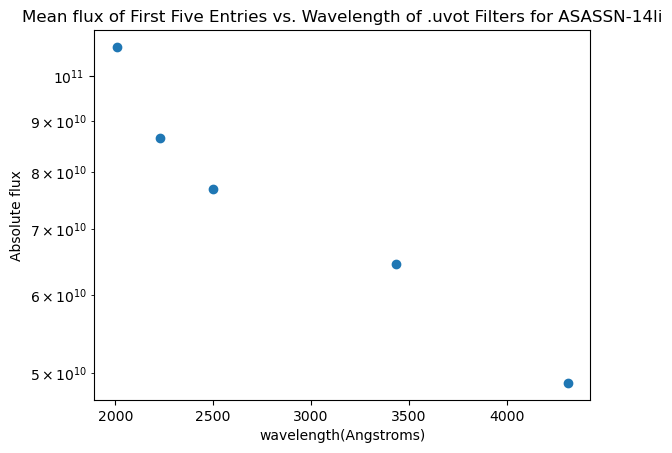

In [79]:
liabs_flux_bin = []
liabs_flux_mean = []
for t in range(0,5):
    liabs_flux_bin.append(li_Aflux[t][:5])
    liabs_flux_mean.append(np.nanmean(liabs_flux_bin[t]))
print(liabs_flux_mean)
plt.scatter(li_wave_list.to_value(),(np.array((liabs_flux_mean))))
plt.yscale('log')
plt.xlabel('wavelength(Angstroms)')
plt.ylabel('Absolute flux')
plt.title('Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-14li')

[array([5.04338569e+10, 5.13714923e+10, 5.47926344e+10, 4.86096150e+10,
       3.89692620e+10]), array([7.02622708e+10, 6.40799526e+10, 6.58752356e+10, 6.29103616e+10,
       5.89823649e+10]), array([1.03448020e+11, 7.99322764e+10, 9.43457153e+10, 8.21716829e+10,
       7.22307595e+10]), array([8.76439983e+10, 7.49414655e+10, 7.99322764e+10, 7.42543980e+10,
       6.70999477e+10]), array([1.26684121e+11, 9.97062039e+10, 1.17685290e+11, 1.02499603e+11,
       8.84549582e+10])]


Text(0.5, 1.0, 'Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-14li')

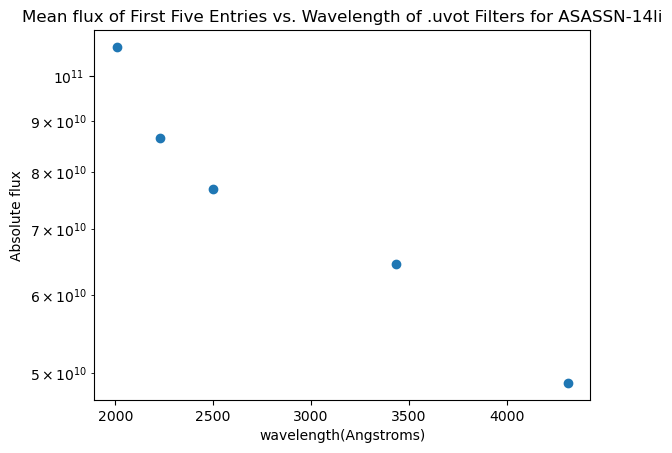

In [80]:
liabs_flux_bin = []
liabs_flux_mean = []
for t in range(0,5):
    liabs_flux_bin.append(li_Aflux[t][:5])
    liabs_flux_mean.append(np.nanmean(liabs_flux_bin[t]))
print(liabs_flux_bin)
plt.scatter(li_wave_list.to_value(),(np.array((liabs_flux_mean))))
plt.yscale('log')
plt.xlabel('wavelength(Angstroms)')
plt.ylabel('Absolute flux')
plt.title('Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-14li')

40.012859296392385


Text(0.5, 1.0, 'Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-15lh')

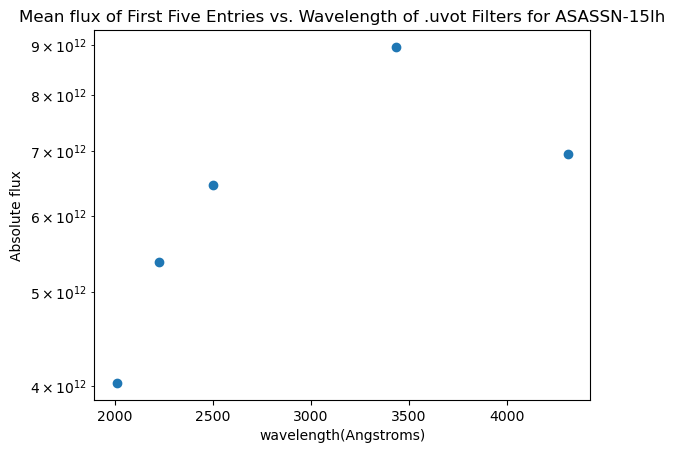

In [81]:
with open("/Users/snorris/manyTDE/data/sources/ASASSN-15lh.json") as f2:
    data2 = json.load(f2)
Tflux_listB = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][0]:
        Tflux_listB.append(data2['lightcurve']["data"][i][2])
Tflux_listU = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][1]:
        Tflux_listU.append(data2['lightcurve']["data"][i][2])       
Tflux_listM2 = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][2]:
        Tflux_listM2.append(data2['lightcurve']["data"][i][2])       
Tflux_listW1 = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][3]:
        Tflux_listW1.append(data2['lightcurve']["data"][i][2])
Tflux_listW2 = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][4]:
        Tflux_listW2.append(data2['lightcurve']["data"][i][2])
flh_wave_list = (np.array(data2['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())[0:5]
d2 = (sol*data2['z'])/Ho
dpc2 = d2.to(u.pc)
dm2 = (5*np.log10(dpc2/(10*u.pc)))
print(dm2)
Tappmag_listB = u.Magnitude((np.array(Tflux_listB)*u.Jy).to(u.AB))
Tappmag_listU = u.Magnitude((np.array(Tflux_listU)*u.Jy).to(u.AB))
Tappmag_listM2 = u.Magnitude((np.array(Tflux_listM2)*u.Jy).to(u.AB))
Tappmag_listW1 = u.Magnitude((np.array(Tflux_listW1)*u.Jy).to(u.AB))
Tappmag_listW2 = u.Magnitude((np.array(Tflux_listW2)*u.Jy).to(u.AB))
Tabmag_listB = Tappmag_listB.value-dm2
Tabmag_listU = Tappmag_listU.value-dm2
Tabmag_listM2 = Tappmag_listM2.value-dm2
Tabmag_listW1 = Tappmag_listW1.value-dm2
Tabmag_listW2 = Tappmag_listW2.value-dm2
flh_Mag_list = (Tabmag_listB.to_value(),Tabmag_listU.to_value(),Tabmag_listM2.to_value(),Tabmag_listW1.to_value(),Tabmag_listW2.to_value())
flh_Aflux = []
for x in range(0,5):
    flh_Aflux.append(10**((flh_Mag_list[x]-8.9)/(-2.5)))
flhabs_flux_bin = []
flhabs_flux_mean = []
for t in range(0,5):
    flhabs_flux_bin.append(flh_Aflux[t][:5])
    flhabs_flux_mean.append(np.nanmean(flhabs_flux_bin[t]))
plt.scatter(flh_wave_list.to_value(),(np.array(flhabs_flux_mean)))
plt.yscale('log')
plt.xlabel('wavelength(Angstroms)')
plt.ylabel('Absolute flux')
plt.title('Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-15lh')

Text(0.5, 1.0, 'Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-14ae')

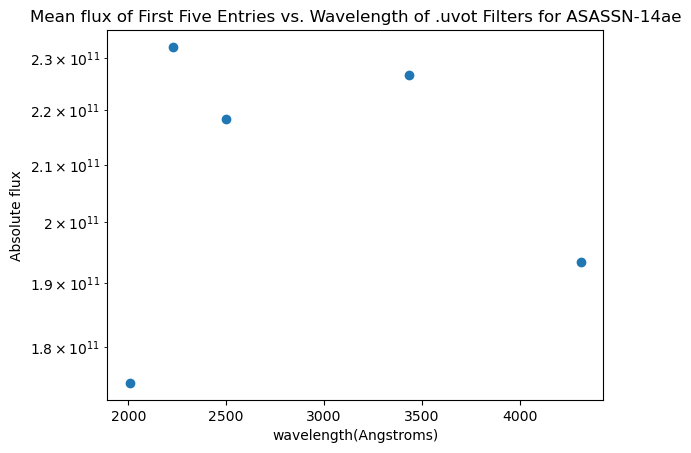

In [82]:
abs_flux_bin = []
abs_flux_mean = []
for t in range(0,5):
    abs_flux_bin.append(ASSA14_Aflux[t][:5])
    abs_flux_mean.append(np.mean(abs_flux_bin[t]))
plt.scatter((ASSA14_wave_list.to(u.angstrom)).to_value(),np.array(abs_flux_mean))
plt.yscale('log')
plt.xlabel('wavelength(Angstroms)')
plt.ylabel('Absolute flux')
plt.title('Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-14ae')


In [83]:
print(flh_Mag_list)

(array([-23.3328593, -23.2728593, -23.2028593, -23.1428593, -23.0528593,
       -23.0428593, -22.9828593, -23.0728593, -22.7628593, -22.7728593,
       -22.6928593, -22.6228593, -22.5828593, -22.4528593, -22.3028593,
       -22.4528593, -22.5628593, -22.3928593, -22.2628593, -22.1128593,
       -22.1228593, -22.2028593, -22.1428593, -22.1928593, -22.1628593,
       -22.3028593, -22.1728593, -22.0928593, -21.9128593, -22.0428593,
       -22.0228593, -21.7428593, -22.0228593, -22.0828593, -22.0828593,
       -21.9228593, -21.9528593, -21.8928593, -21.6028593, -21.4528593,
       -21.5628593, -21.5728593, -21.4828593, -21.3228593, -21.3628593,
       -21.2928593, -20.9128593, -21.4928593, -20.9228593, -21.3528593,
       -21.1328593, -21.0428593, -21.1428593, -20.9928593, -20.8128593,
       -20.9828593, -21.2028593, -20.6928593, -20.3328593, -20.6428593,
       -20.6128593, -20.7328593, -19.8528593]), array([-23.6028593, -23.5528593, -23.5028593, -23.4528593, -23.2628593,
       -23.2228

In [84]:
print(li_Mag_list)

(array([-17.85680545, -17.87680545, -17.94680545, -17.81680545,
       -17.57680545, -17.68680545, -17.68680545, -17.43680545,
       -17.53680545, -17.18680545, -17.14680545, -17.36680545,
       -17.00680545, -17.24680545, -16.37680545, -16.83680545,
       -16.88680545, -16.75680545, -16.51680545, -16.58680545,
       -16.78680545, -16.92680545, -16.51680545, -16.59680545,
       -16.62680545, -16.26680545, -16.60680545, -16.04680545,
       -16.09680545, -15.99680545, -15.09680545, -14.01680545,
       -12.19680545, -14.44680545, -15.68680545, -14.28680545,
       -14.94680545, -16.13680545, -14.40680545, -14.20680545]), array([-18.21680545, -18.11680545, -18.14680545, -18.09680545,
       -18.02680545, -17.85680545, -17.80680545, -17.74680545,
       -17.78680545, -17.63680545, -17.53680545, -17.57680545,
       -17.32680545, -17.14680545, -17.23680545, -17.04680545,
       -17.07680545, -17.00680545, -16.96680545, -17.08680545,
       -17.02680545, -16.89680545, -16.93680545, -16

In [85]:
print(ASSA14_Mag_list)

(array([-19.52738762, -19.46738762, -19.28738762, -19.18738762,
       -19.03738762, -18.23738762, -16.96738762, -17.45738762,
       -17.32738762, -17.35738762, -17.86738762, -17.84738762,
       -16.67738762, -17.76738762, -17.23738762, -12.78738762,
       -16.30738762, -14.07738762, -16.51738762, -16.29738762,
       -16.22738762]), array([-19.69738762, -19.73738762, -19.43738762, -19.34738762,
       -19.09738762, -18.10738762, -17.51738762, -17.71738762,
       -17.76738762, -17.40738762, -17.05738762, -17.13738762,
       -17.20738762, -17.07738762, -16.65738762, -15.76738762,
       -15.16738762, -15.17738762]), array([-19.95738762, -19.95738762, -19.24738762, -19.07738762,
       -18.84738762, -17.87738762, -17.74738762, -17.54738762,
       -17.59738762, -17.56738762, -17.36738762, -17.16738762,
       -16.89738762, -16.91738762, -16.82738762, -16.20738762,
       -16.31738762, -16.13738762, -16.05738762, -16.08738762,
       -15.32738762, -15.60738762, -14.76738762, -14.0073

In [86]:
liabs_flux_mean_erg = []
for x in range(0,5):
    liabs_flux_mean_erg.append((liabs_flux_mean[x]*.00003)/(li_wave_list.to_value()[x])**2)
liabs_flux_mean_erg


[0.07880150697810034,
 0.16381703491091215,
 0.5230283378784033,
 0.3683458820667332,
 0.795810893382185]

[48835372120.567055, 64422037098.886856, 86425690782.25517, 76774417178.02, 107006035068.35036]


Text(0.5, 1.0, 'Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-14li')

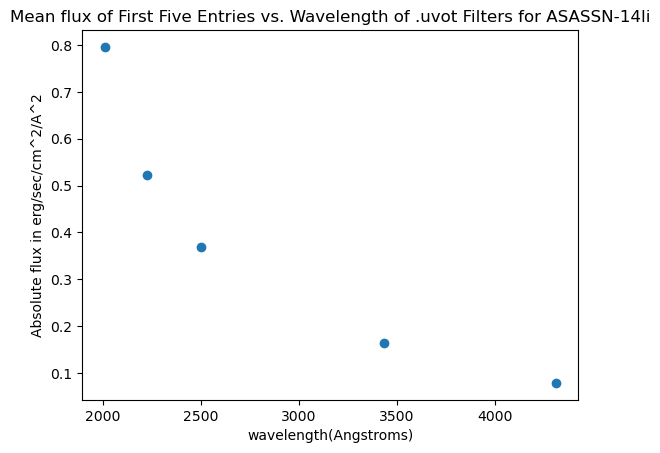

In [87]:
liabs_flux_bin = []
liabs_flux_mean = []
for t in range(0,5):
    liabs_flux_bin.append(li_Aflux[t][:5])
    liabs_flux_mean.append(np.nanmean(liabs_flux_bin[t]))
print(liabs_flux_mean)
plt.scatter(li_wave_list.to_value(),(np.array((liabs_flux_mean_erg))))
#plt.yscale('log')
plt.xlabel('wavelength(Angstroms)')
plt.ylabel('Absolute flux in erg/sec/cm^2/A^2')
plt.title('Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-14li')

In [88]:
from dustmaps.config import config
config['data_dir'] = '/path/to/store/maps/in'


In [89]:
from dustmaps.config import config
config.reset()

In [90]:
config['SASP-TDE'] = '/path/to/store/maps/in'

In [91]:
data1['lightcurve']['filters']

['B.uvot',
 'U.uvot',
 'UVM2.uvot',
 'UVW1.uvot',
 'UVW2.uvot',
 'W1.wise',
 'W2.wise']

40.012859296392385


Text(0.5, 1.0, 'Corrected Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-15lh')

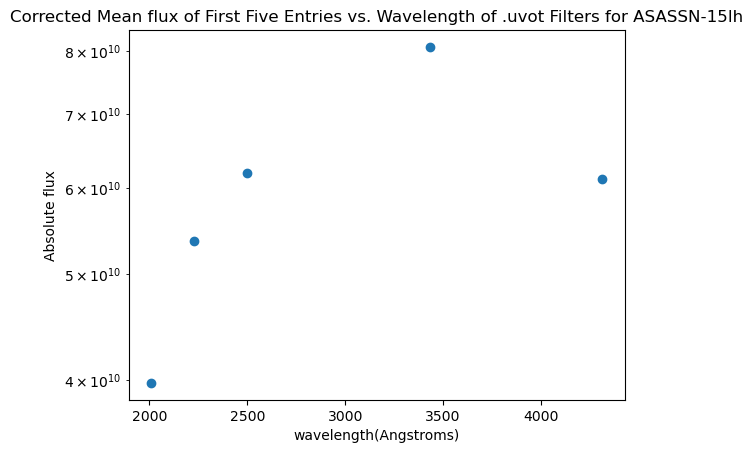

In [92]:
CTflux_listB = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][0]:
        CTflux_listB.append(data2['lightcurve']["data"][i][2])
CTflux_listB = np.array(CTflux_listB)/ data2['extinction']['linear_extinction']['B.uvot']

CTflux_listU = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][1]:
        CTflux_listU.append(data2['lightcurve']["data"][i][2]) 
CTflux_listU = np.array(CTflux_listU)/ data2['extinction']['linear_extinction']['U.uvot']

CTflux_listM2 = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][2]:
        CTflux_listM2.append(data2['lightcurve']["data"][i][2])       
CTflux_listM2 = np.array(CTflux_listM2)/ data2['extinction']['linear_extinction']['UVM2.uvot']

CTflux_listW1 = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][3]:
        CTflux_listW1.append(data2['lightcurve']["data"][i][2])
CTflux_listW1 = np.array(CTflux_listW1)/ data2['extinction']['linear_extinction']['UVW1.uvot']

CTflux_listW2 = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][4]:
        CTflux_listW2.append(data2['lightcurve']["data"][i][2])
CTflux_listW2 = np.array(CTflux_listW2)/data2['extinction']['linear_extinction']['UVW2.uvot']

flh_wave_list = (np.array(data2['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())[0:5]
d2 = (sol*data2['z'])/Ho
dpc2 = d2.to(u.pc)
dm2 = (5*np.log10(dpc2/(10*u.pc)))
print(dm2)
CTappmag_listB = u.Magnitude((CTflux_listB*u.Jy).to(u.AB))
CTappmag_listU = u.Magnitude((CTflux_listU*u.Jy).to(u.AB))
CTappmag_listM2 = u.Magnitude((CTflux_listM2*u.Jy).to(u.AB))
CTappmag_listW1 = u.Magnitude((CTflux_listW1*u.Jy).to(u.AB))
CTappmag_listW2 = u.Magnitude((CTflux_listW2*u.Jy).to(u.AB))
CTabmag_listB = CTappmag_listB.value-dm1
CTabmag_listU = CTappmag_listU.value-dm1
CTabmag_listM2 = CTappmag_listM2.value-dm1
CTabmag_listW1 = CTappmag_listW1.value-dm1
CTabmag_listW2 = CTappmag_listW2.value-dm1
Cflh_Mag_list = (CTabmag_listB.to_value(),CTabmag_listU.to_value(),CTabmag_listM2.to_value(),CTabmag_listW1.to_value(),CTabmag_listW2.to_value())
Cflh_Aflux = []
for x in range(0,5):
    Cflh_Aflux.append(10**((Cflh_Mag_list[x]-8.9)/(-2.5)))
Cflhabs_flux_bin = []
Cflhabs_flux_mean = []
for t in range(0,5):
    Cflhabs_flux_bin.append(Cflh_Aflux[t][:5])
    Cflhabs_flux_mean.append(np.nanmean(Cflhabs_flux_bin[t]))
plt.scatter(flh_wave_list.to_value(),(np.array(Cflhabs_flux_mean)))
plt.yscale('log')
plt.xlabel('wavelength(Angstroms)')
plt.ylabel('Absolute flux')
plt.title('Corrected Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-15lh')

In [93]:
print(CTflux_listU)
print(Tflux_listU)

[1.13961559e-03 1.08832444e-03 1.03934177e-03 9.92563684e-04
 8.33217497e-04 8.03079207e-04 7.46033589e-04 6.99452749e-04
 6.99452749e-04 7.25702102e-04 6.99452749e-04 6.03612717e-04
 6.26265346e-04 5.40453559e-04 4.79466624e-04 4.41324849e-04
 4.06217268e-04 3.53800450e-04 3.10998562e-04 3.10998562e-04
 2.88907211e-04 3.47342864e-04 2.73374739e-04 2.61070849e-04
 2.29487155e-04 2.42526043e-04 2.51627661e-04 2.61070849e-04
 2.47034939e-04 2.58677337e-04 2.81033687e-04 2.68385088e-04
 2.58677337e-04 2.61070849e-04 2.70868424e-04 2.53955943e-04
 2.47034939e-04 2.86258493e-04 2.63486508e-04 2.75904244e-04
 2.86258493e-04 2.75904244e-04 2.86258493e-04 2.68385088e-04
 2.73374739e-04 2.88907211e-04 2.63486508e-04 2.53955943e-04
 2.70868424e-04 2.94278397e-04 2.53955943e-04 2.91580436e-04
 2.61070849e-04 2.44770109e-04 2.61070849e-04 2.61070849e-04
 2.75904244e-04 2.49320725e-04 2.83634060e-04 2.07375947e-04
 2.15158437e-04 2.09294773e-04 2.40302551e-04 2.17149274e-04
 2.03590909e-04 2.112313

In [102]:
data1['extinction']['linear_extinction']['U.uvot']

0.8694440079633056

In [95]:
0.0009908319448927564 / 0.9036506020216781

0.0010964768270789985

In [96]:
Tappmag_listB

<Magnitude [16.68, 16.74, 16.81, 16.87, 16.96, 16.97, 17.03, 16.94, 17.25,
            17.24, 17.32, 17.39, 17.43, 17.56, 17.71, 17.56, 17.45, 17.62,
            17.75, 17.9 , 17.89, 17.81, 17.87, 17.82, 17.85, 17.71, 17.84,
            17.92, 18.1 , 17.97, 17.99, 18.27, 17.99, 17.93, 17.93, 18.09,
            18.06, 18.12, 18.41, 18.56, 18.45, 18.44, 18.53, 18.69, 18.65,
            18.72, 19.1 , 18.52, 19.09, 18.66, 18.88, 18.97, 18.87, 19.02,
            19.2 , 19.03, 18.81, 19.32, 19.68, 19.37, 19.4 , 19.28, 20.16] mag(AB)>

In [97]:
CTappmag_listB

<Magnitude [16.55353452, 16.61353452, 16.68353452, 16.74353452,
            16.83353452, 16.84353452, 16.90353452, 16.81353452,
            17.12353452, 17.11353452, 17.19353452, 17.26353452,
            17.30353452, 17.43353452, 17.58353452, 17.43353452,
            17.32353452, 17.49353452, 17.62353452, 17.77353452,
            17.76353452, 17.68353452, 17.74353452, 17.69353452,
            17.72353452, 17.58353452, 17.71353452, 17.79353452,
            17.97353452, 17.84353452, 17.86353452, 18.14353452,
            17.86353452, 17.80353452, 17.80353452, 17.96353452,
            17.93353452, 17.99353452, 18.28353452, 18.43353452,
            18.32353452, 18.31353452, 18.40353452, 18.56353452,
            18.52353452, 18.59353452, 18.97353452, 18.39353452,
            18.96353452, 18.53353452, 18.75353452, 18.84353452,
            18.74353452, 18.89353452, 19.07353452, 18.90353452,
            18.68353452, 19.19353452, 19.55353452, 19.24353452,
            19.27353452, 19.15353452, 20

In [98]:
np.array(Cflhabs_flux_mean)

array([6.11311098e+10, 8.06735603e+10, 5.36389609e+10, 6.18229899e+10,
       3.97676429e+10])

In [99]:
np.array(flhabs_flux_mean)

array([6.95180570e+12, 8.96178208e+12, 5.37248721e+12, 6.45225257e+12,
       4.03244055e+12])

In [100]:
import extinction
extinction.ccm89(np.array(data1['lightcurve']['frequency_Hz']),0.8694440079633056,5.039092947679)

array([1.42864172e-18, 9.90640403e-19, 4.92932037e-19, 5.94245247e-19,
       4.17564964e-19, 3.84689202e-17, 6.41810700e-17])

In [101]:
U.uvot'] * u.Hz.to(u.angstrom, equivalencies=u.spectral())

SyntaxError: unterminated string literal (detected at line 1) (2050466398.py, line 1)

In [ ]:
data2['lightcurve']['frequency_Hz']

In [ ]:
data2